Text(0, 0.5, 'Water Drinks (Litre)')

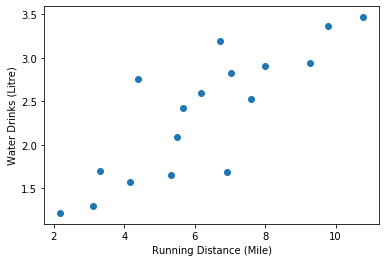

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

In [39]:
def min_sq_error(y, x, w1, w0):
    y_pred = [(w1*i)+w0 for i in x]
    sum_squared_error = sum([(y_pred[i]-y[i])**2 for i in range(len(y))])
    N = len(y)
    mse = sum_squared_error/N
    return mse

print(min_sq_error(y, x, 0.7, 0.3))
print(min_sq_error(y, x, 0.25163494, 0.79880123))

6.518593101764703
0.15385767404191164


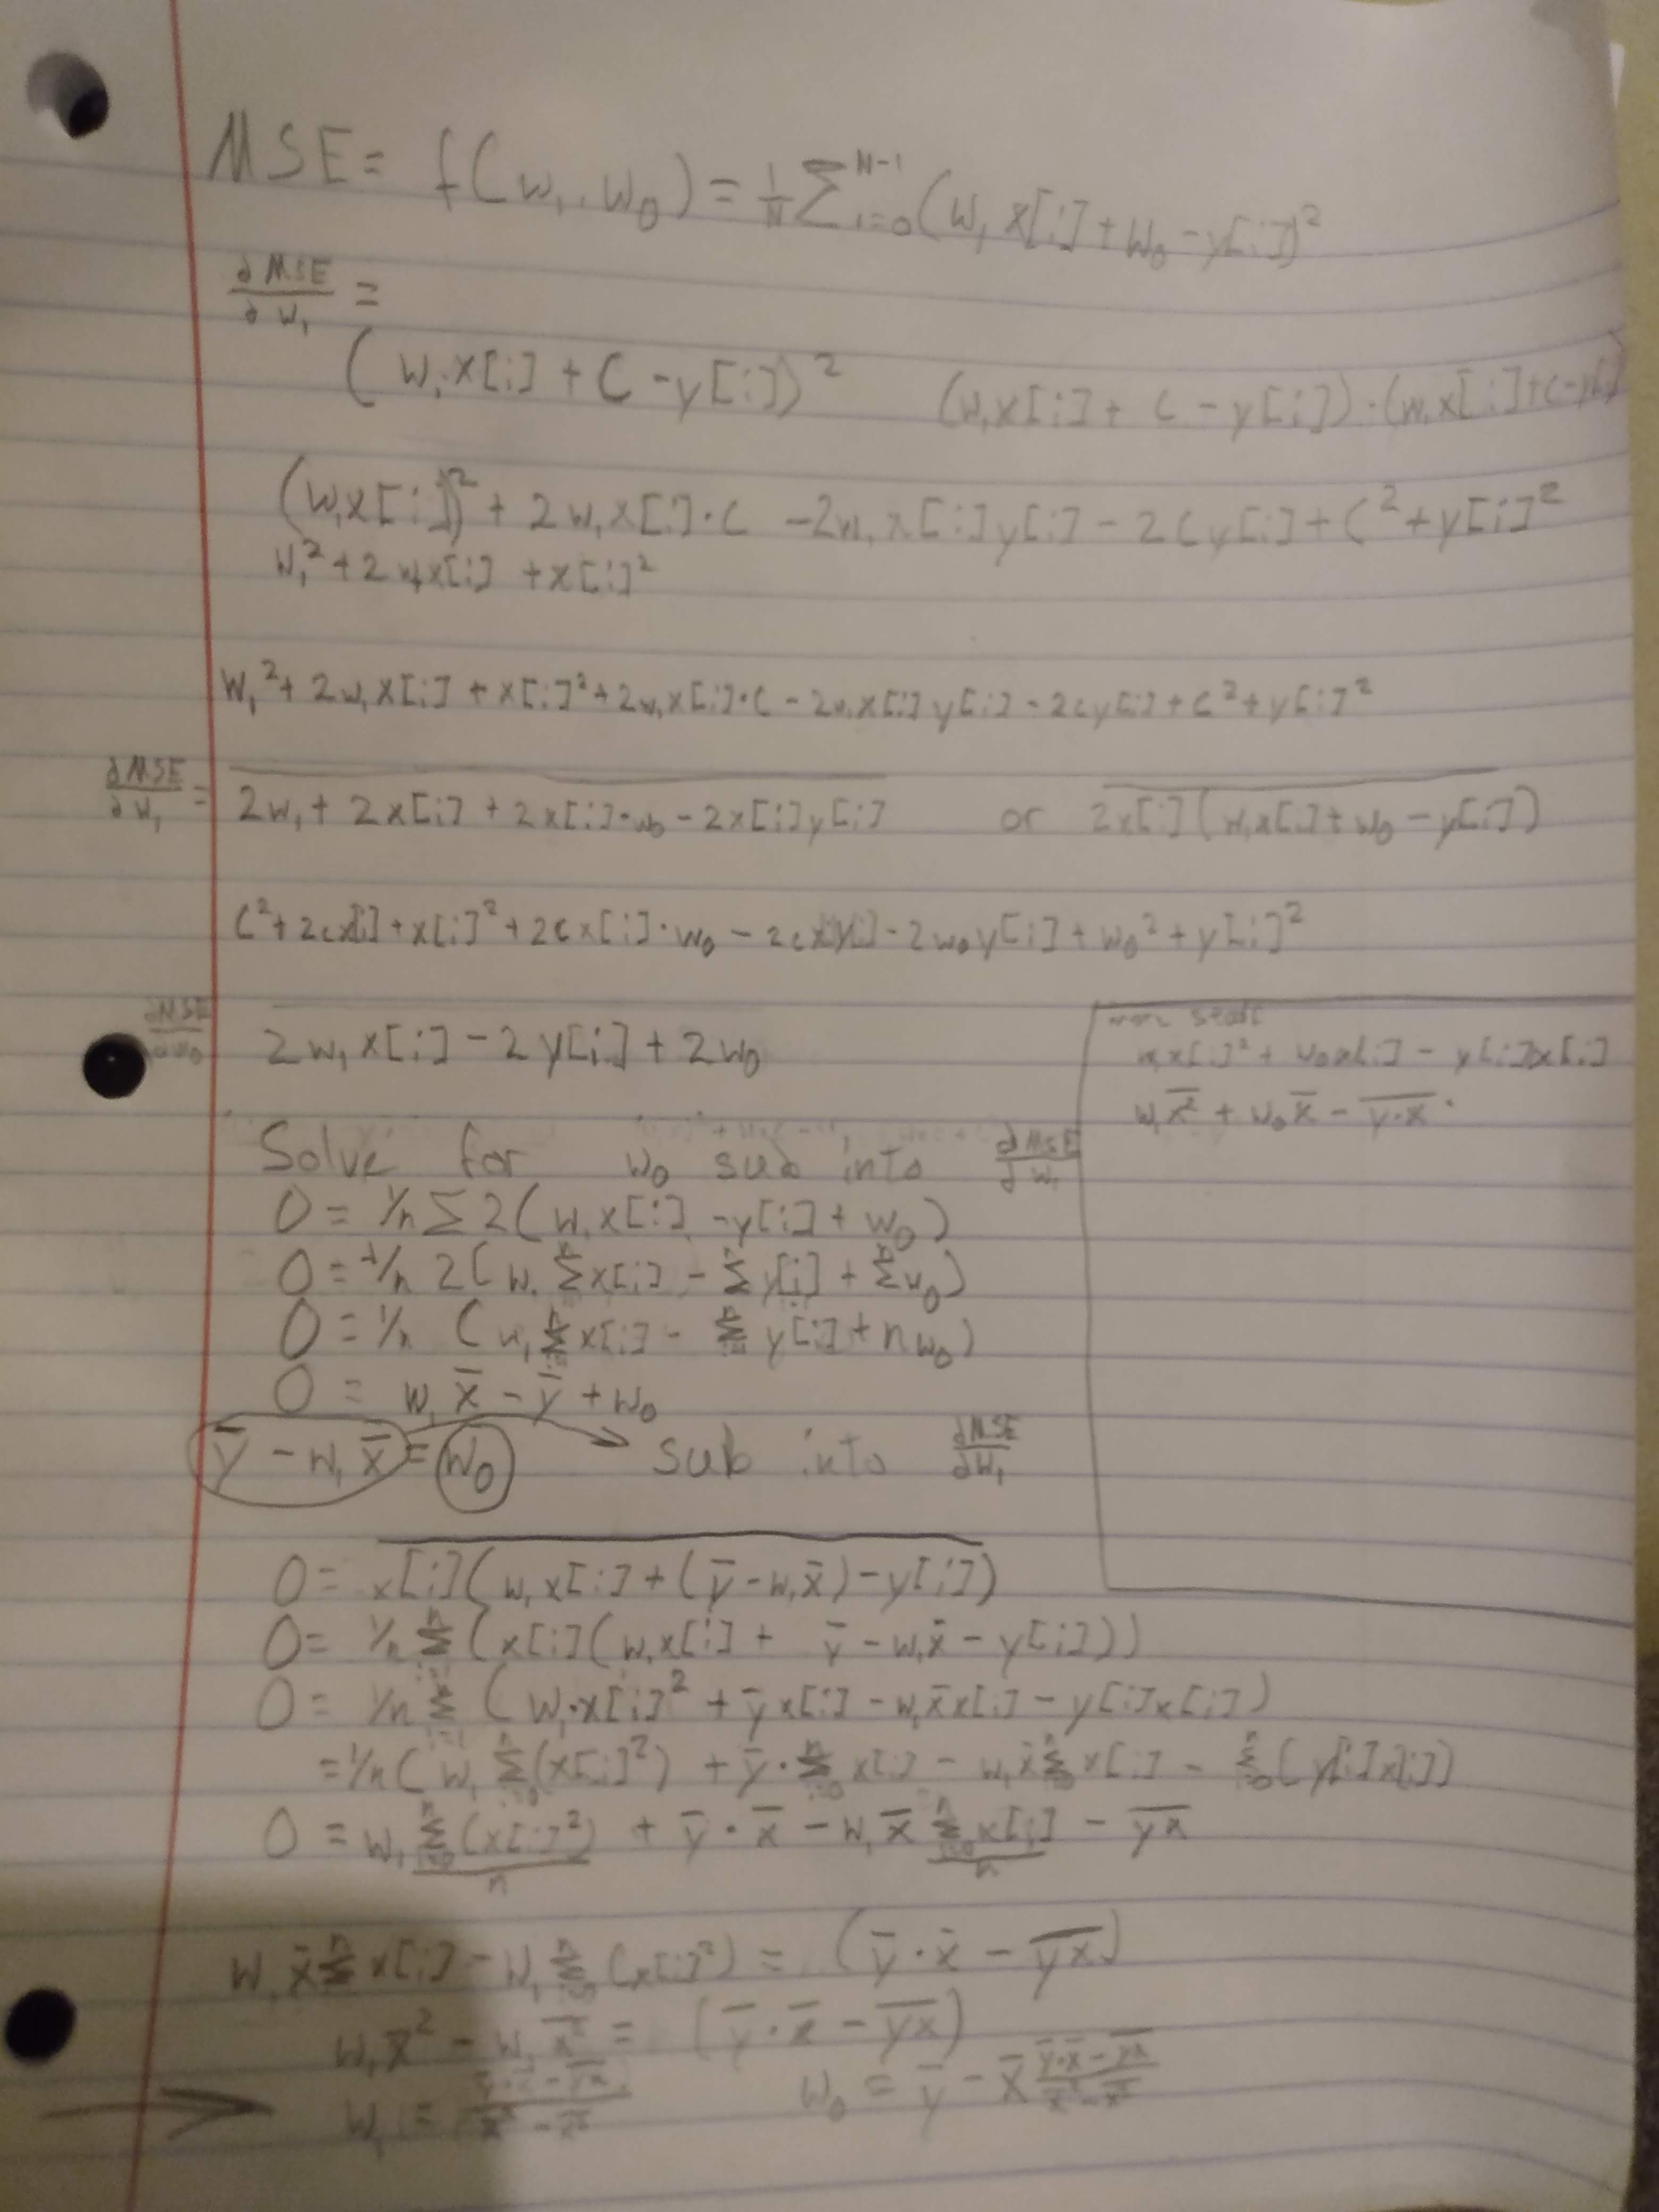# 

In [40]:
def slope_intercept_LR(x, y):
    w1 = ((np.mean(y)*np.mean(x)) - np.mean([a*b for a,b in zip(x,y)])) / ((np.mean(x)**2) - (np.mean([i**2 for i in x])))
    w0 = np.mean(y)-np.mean(x)*((np.mean(y)*np.mean(x))-np.mean([a*b for a,b in zip(x,y)]))/((np.mean(x)**2)-(np.mean([i**2 for i in x])))
    return w1, w0
print(slope_intercept_LR(x, y))

(0.25163494428355315, 0.7988012261753947)


In [41]:
def y_pred_list(w1, w0, x):
    return [(w1*i)+w0 for i in x]
def mean_of_my_LR_pred(x,y,LR):
    w1, w0 = LR(x,y)
    ypred = y_pred_list(w1, w0, x)
    return sum(ypred)/len(ypred)

def variance_of_my_LR_pred(x, y, LR):
    w1, w0 = LR(x,y)
    mean = mean_of_my_LR_pred(x,y,LR)
    ypred = y_pred_list(w1, w0, x)
    number = sum([(i-mean)**2 for i in ypred])
    _var = np.sqrt(number/int(len(ypred)-1))
    return _var
print('The mean of mine is: ', mean_of_my_LR_pred(x,y,slope_intercept_LR))
print('The variance of mine is; ', variance_of_my_LR_pred(x, y, slope_intercept_LR))
print()
print('The mean of the given is: ', sum(y_pred_list(0.25163494, 0.79880123, x))/len(x))
print('The variance of given is; ', np.sqrt((sum([(i-(sum(y_pred_list(0.25163494, 0.79880123, x))/len(x)))**2 
                                                  for i in y_pred_list(0.25163494, 0.79880123, x)]))/int(len(x)-1)))

The mean of mine is:  2.366235294117647
The variance of mine is;  0.6072883684930394

The mean of the given is:  2.36623527126
The variance of given is;  0.6072883581552383


In [42]:
w_0 = np.random.randn()
w_1 = np.random.randn()
step = 0.01
epoch = 5000
for _ in range(epoch):
    w_1 = w_1 - step*(w_1*np.mean([i**2 for i in x]) +w_0*np.mean(x)-np.mean([a*b for a,b in zip(x,y)]))
    w_0 = w_0 - step*(w_1*np.mean(x)-np.mean(y)+w_0)
    if _%500 == 0:
        print(w_1)
        print(w_0)
        print()
print(w_1)
print(w_0)

0.8423160771511045
0.3539164060473877

0.288782041734552
0.5354513152831417

0.2717671785563131
0.6560761556961473

0.2625458063595991
0.7214499725740959

0.257548193137585
0.7568799546454402

0.25483968757203035
0.7760815813749817

0.2533717863814528
0.7864880915537963

0.2525762429154537
0.792128001944053

0.25214509032129007
0.7951846067677203

0.2519114229386779
0.7968411637697989

0.2517849682917966
0.7977376488863555
